In [ ]:
import pandas as pd

# Loading the dataset
file_path = 'data.csv'
data = pd.read_csv(file_path)

# Displaying the first 5 rows of the dataset
print("First 5 rows of the dataset:")
print(data.head())

# Displaying basic information about the dataset
print("\nDataset Info:")
print(data.info())

# Displaying basic statistics of numeric columns
print("\nBasic Statistics of Numeric Columns:")
print(data.describe())

<ipython-input-1-d8df38adb265>:5: DtypeWarning: Columns (29,30,31,32,33,34,35,36,37,38,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


First 5 rows of the dataset:
          ID   Source  Severity                     Start_Time  \
0  A-2047758  Source2         2            2019-06-12 10:10:56   
1  A-4694324  Source1         2  2022-12-03 23:37:14.000000000   
2  A-5006183  Source1         2  2022-08-20 13:13:00.000000000   
3  A-4237356  Source1         2            2022-02-21 17:43:04   
4  A-6690583  Source1         2            2020-12-04 01:46:00   

                        End_Time  Start_Lat   Start_Lng    End_Lat  \
0            2019-06-12 10:55:58  30.641211  -91.153481        NaN   
1  2022-12-04 01:56:53.000000000  38.990562  -77.399070  38.990037   
2  2022-08-20 15:22:45.000000000  34.661189 -120.492822  34.661189   
3            2022-02-21 19:43:23  43.680592  -92.993317  43.680574   
4            2020-12-04 04:13:09  35.395484 -118.985176  35.395476   

      End_Lng  Distance(mi)  ... Roundabout Station   Stop Traffic_Calming  \
0         NaN         0.000  ...      False   False  False           False 

In [ ]:
# Checking for missing values
missing_values = data.isnull().sum().sort_values(ascending=False)
missing_percentage = (missing_values / len(data)) * 100

# Creating a DataFrame to summarize missing values
missing_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percentage
})

# Displaying columns with missing values
print("Columns with Missing Values:")
print(missing_summary[missing_summary['Missing Values'] > 0])

Columns with Missing Values:
                       Missing Values  Percentage (%)
End_Lat                         35330       44.280952
End_Lng                         35330       44.280952
Precipitation(in)               22740       28.501241
Wind_Chill(F)                   20518       25.716291
Wind_Speed(mph)                  5852        7.334620
Visibility(mi)                   1806        2.263555
Humidity(%)                      1789        2.242248
Weather_Condition                1782        2.233475
Wind_Direction                   1766        2.213421
Temperature(F)                   1671        2.094352
Pressure(in)                     1396        1.749680
Weather_Timestamp                1203        1.507783
Nautical_Twilight                 237        0.297045
Civil_Twilight                    237        0.297045
Sunrise_Sunset                    237        0.297045
Astronomical_Twilight             237        0.297045
Airport_Code                      233        0.292031

Insights from Missing Data

	1.	Critical Missing Data (High Percentage):
	•	End_Lat (44.28%) and End_Lng (44.28%): Significant missing data; these may not be useful unless imputed strategically.
	•	Precipitation(in) (28.50%) and Wind_Chill(F) (25.71%): Environmental features with high missing values; consider imputing or dropping.
	2.	Moderate Missing Data (5-30%):
	•	Wind_Speed(mph) (7.33%), Visibility(mi) (2.26%), Humidity(%) (2.24%), Weather_Condition (2.23%): Critical weather features worth imputing.
	3.	Minimal Missing Data (<5%):
	•	Features like Temperature(F), Pressure(in), and Weather_Timestamp have very few missing values and can be imputed easily.
	4.	Negligible Missing Data:
	•	Columns like Country, Turning_Loop, and Traffic_Signal have <0.01% missing values. These can be filled with their mode (most frequent value).

In [ ]:
# Handling Missing Data

# Droping columns with >30% missing values
columns_to_drop = ['End_Lat', 'End_Lng', 'Precipitation(in)', 'Wind_Chill(F)']
data_cleaned = data.drop(columns=columns_to_drop, axis=1)

# Impute missing numerical columns with median
numerical_columns = ['Wind_Speed(mph)', 'Visibility(mi)', 'Humidity(%)',
                     'Temperature(F)', 'Pressure(in)']
for col in numerical_columns:
    data_cleaned[col] = data_cleaned[col].fillna(data_cleaned[col].median())

# Impute missing categorical columns with mode
categorical_columns = ['Weather_Condition', 'Timezone', 'Street', 'Zipcode',
                       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
                       'Astronomical_Twilight', 'Airport_Code']
for col in categorical_columns:
    data_cleaned[col] = data_cleaned[col].fillna(data_cleaned[col].mode()[0])

# Verify missing values after imputation
missing_after_imputation = data_cleaned.isnull().sum().sum()
print(f"Total Missing Values After Cleaning: {missing_after_imputation}")

Total Missing Values After Cleaning: 2986


In [ ]:
# Checking Remaining Missing Values
remaining_missing = data_cleaned.isnull().sum()
print("Columns with Remaining Missing Values:")
print(remaining_missing[remaining_missing > 0])

Columns with Remaining Missing Values:
City                    1
County                  1
State                   1
Country                 1
Weather_Timestamp    1203
Wind_Direction       1766
Amenity                 1
Bump                    1
Crossing                1
Give_Way                1
Junction                1
No_Exit                 1
Railway                 1
Roundabout              1
Station                 1
Stop                    1
Traffic_Calming         1
Traffic_Signal          1
Turning_Loop            1
dtype: int64


In [ ]:
# Handling Remaining Missing Values

# Impute categorical columns with 1 missing value using mode
columns_with_one_missing = ['City', 'County', 'State', 'Country', 'Amenity', 'Bump',
                            'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
                            'Roundabout', 'Station', 'Stop', 'Traffic_Calming',
                            'Traffic_Signal', 'Turning_Loop']

for col in columns_with_one_missing:
    data_cleaned[col] = data_cleaned[col].fillna(data_cleaned[col].mode()[0])

# Handling 'Weather_Timestamp' (forward-fill or drop rows with missing values)
data_cleaned['Weather_Timestamp'] = data_cleaned['Weather_Timestamp'].fillna(method='ffill')

# Handling 'Wind_Direction' (impute with mode)
data_cleaned['Wind_Direction'] = data_cleaned['Wind_Direction'].fillna(data_cleaned['Wind_Direction'].mode()[0])

# Verifying remaining missing values
remaining_missing_after_cleaning = data_cleaned.isnull().sum().sum()
print(f"Total Missing Values After Second Cleaning: {remaining_missing_after_cleaning}")

<ipython-input-6-5a3b4e8aeb9a>:10: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_cleaned[col] = data_cleaned[col].fillna(data_cleaned[col].mode()[0])
<ipython-input-6-5a3b4e8aeb9a>:13: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_cleaned['Weather_Timestamp'] = data_cleaned['Weather_Timestamp'].fillna(method='ffill')


Total Missing Values After Second Cleaning: 0


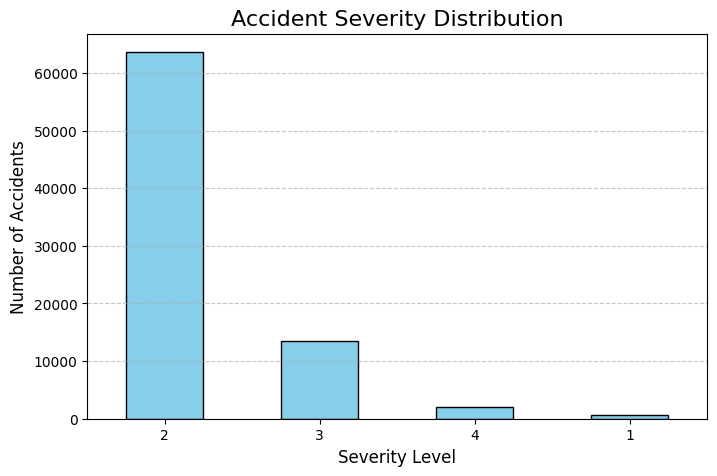

In [ ]:
# Visualize Accident Severity Distribution
import matplotlib.pyplot as plt

# Counting the occurrences of each severity level
severity_counts = data_cleaned['Severity'].value_counts()

# Plotting the distribution
plt.figure(figsize=(8, 5))
severity_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Accident Severity Distribution', fontsize=16)
plt.xlabel('Severity Level', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Observations:

	1.	Severity Level 2 dominates: These are accidents with moderate traffic impact and delays.
	2.	Severity Level 4 is rare: Severe accidents with significant delays are less frequent.
	3.	Severity Level 1 is minimal: Minor traffic-impact accidents are also less common, potentially because they are underreported.

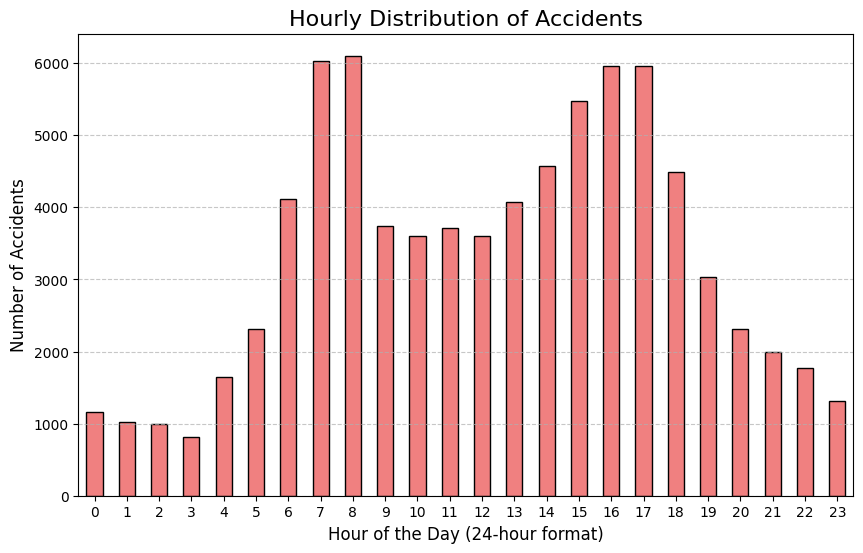

In [ ]:
# Analyzing Hourly Accident Distribution (Fix for datetime conversion)

# Removing extra fractional seconds if they exist
data_cleaned['Start_Time'] = data_cleaned['Start_Time'].str.replace(r'\.\d+$', '', regex=True)

# Converting 'Start_Time' to datetime
data_cleaned['Start_Time'] = pd.to_datetime(data_cleaned['Start_Time'], errors='coerce')

# Dropping rows where 'Start_Time' could not be converted
data_cleaned = data_cleaned.dropna(subset=['Start_Time'])

# Extracting hour from 'Start_Time'
data_cleaned['Hour'] = data_cleaned['Start_Time'].dt.hour

# Counting accidents per hour
hourly_accidents = data_cleaned['Hour'].value_counts().sort_index()

# Plotting the hourly distribution
plt.figure(figsize=(10, 6))
hourly_accidents.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Hourly Distribution of Accidents', fontsize=16)
plt.xlabel('Hour of the Day (24-hour format)', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Observations:

	1.	Morning Peak:
	•	A noticeable spike occurs around 7-8 AM, likely due to morning rush hour when people commute to work or school.
	2.	Evening Peak:
	•	Another prominent spike is observed around 4-6 PM, corresponding to the evening rush hour when people return home.
	3.	Lower Activity at Night:
	•	Accidents are less frequent between 12 AM to 5 AM, reflecting reduced traffic volumes during late-night hours.

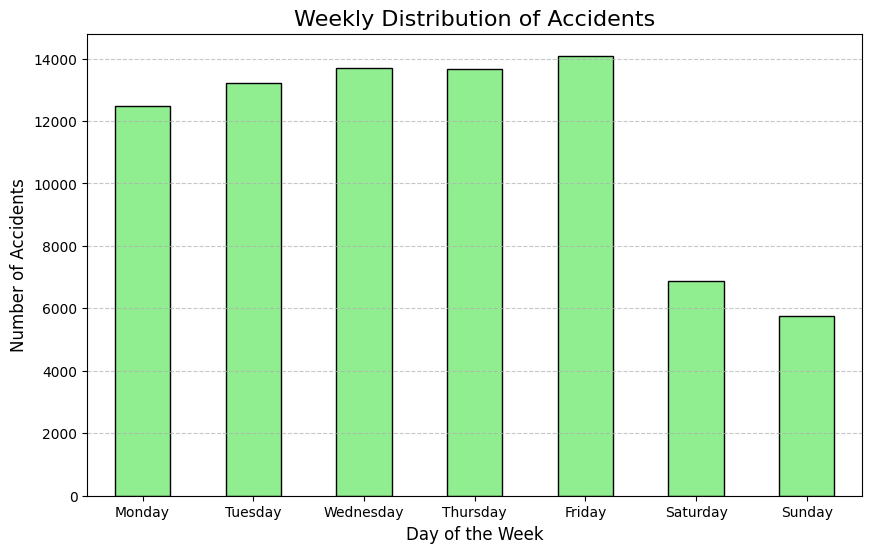

In [ ]:
# Analyze Weekly Accident Distribution
# Extracting the day of the week from 'Start_Time'
data_cleaned['Day_of_Week'] = data_cleaned['Start_Time'].dt.day_name()

# Counting accidents by day of the week
weekly_accidents = data_cleaned['Day_of_Week'].value_counts()

# Reordering to reflect the actual week order
weekdays_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_accidents = weekly_accidents.reindex(weekdays_order)

# Plotting the weekly distribution
plt.figure(figsize=(10, 6))
weekly_accidents.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Weekly Distribution of Accidents', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Observations:

	1.	Weekday Dominance:
	•	Accidents are more frequent from Monday to Friday, with Friday having the highest number of accidents. This aligns with increased weekday traffic due to work and school commutes.
	2.	Weekend Decline:
	•	Accidents drop significantly on Saturday and Sunday, likely due to reduced traffic volumes as fewer people commute for work.
	3.	Friday Peak:
	•	The sharp peak on Friday could be attributed to:
	•	Increased traffic in the evening (end of the workweek).
	•	Potential fatigue or rush during commutes.

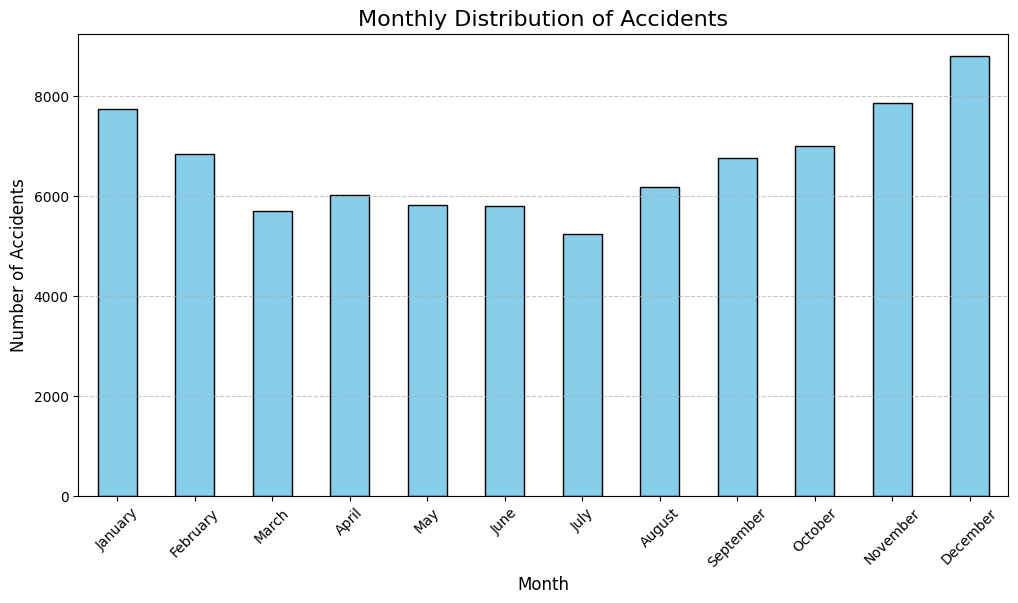

In [ ]:
# Analyze Monthly Accident Distribution
# Extracting the month from 'Start_Time'
data_cleaned['Month'] = data_cleaned['Start_Time'].dt.month_name()

# Counting accidents by month
monthly_accidents = data_cleaned['Month'].value_counts()

# Reordering to reflect the calendar order
months_order = ['January', 'February', 'March', 'April', 'May', 'June',
                'July', 'August', 'September', 'October', 'November', 'December']
monthly_accidents = monthly_accidents.reindex(months_order)

# Plotting the monthly distribution
plt.figure(figsize=(12, 6))
monthly_accidents.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Monthly Distribution of Accidents', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Observations:

	1.	High Accident Months:
	•	January and December: These months have the highest number of accidents. Potential reasons:
	•	Winter weather conditions (snow, ice) leading to hazardous roads.
	•	Increased travel during holidays (e.g., Christmas, New Year).
	2.	Low Accident Months:
	•	April, May, and June: Fewer accidents occur during these months. Possible explanations:
	•	Milder weather conditions and improved road conditions.
	•	Seasonal reduction in heavy traffic (e.g., fewer commutes or travel disruptions).
	3.	Gradual Rise in Fall:
	•	Accidents increase gradually in September, October, and November, potentially due to:
	•	Shorter daylight hours in autumn.
	•	Increased traffic with schools reopening and holiday preparations.

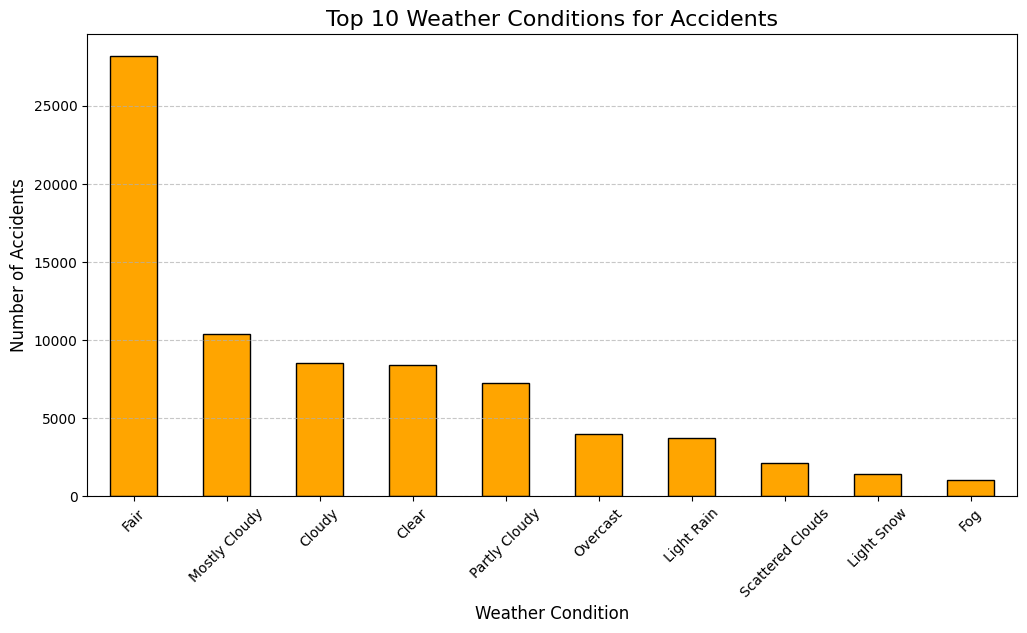

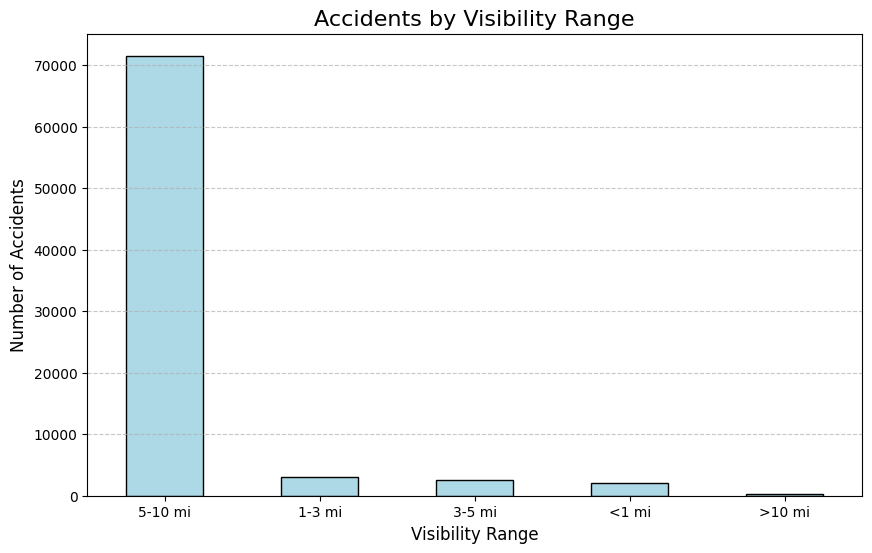

In [ ]:
# Analyze Weather Conditions
# Counting accidents by weather condition
weather_conditions = data_cleaned['Weather_Condition'].value_counts().head(10)  # Top 10 weather conditions

# Plotting the weather condition distribution
plt.figure(figsize=(12, 6))
weather_conditions.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Top 10 Weather Conditions for Accidents', fontsize=16)
plt.xlabel('Weather Condition', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Analyzing Visibility
# Grouping accidents by visibility range
visibility_bins = [0, 1, 3, 5, 10, 20]  # Define ranges
data_cleaned['Visibility_Range'] = pd.cut(data_cleaned['Visibility(mi)'], bins=visibility_bins,
                                          labels=['<1 mi', '1-3 mi', '3-5 mi', '5-10 mi', '>10 mi'])
visibility_counts = data_cleaned['Visibility_Range'].value_counts()

# Plotting visibility impact
plt.figure(figsize=(10, 6))
visibility_counts.plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Accidents by Visibility Range', fontsize=16)
plt.xlabel('Visibility Range', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Weather Conditions and Accidents

	1.	Fair Weather Dominates:
	•	Most accidents occur in fair weather conditions, likely due to higher traffic volumes when weather conditions are not limiting mobility.
	•	This implies that poor driving behavior, rather than hazardous weather, might be the main cause during these conditions.
	2.	Cloudy and Partly Cloudy Conditions:
	•	Cloudy and partly cloudy weather follow, which could reduce visibility slightly but not significantly impact road usability.
	3.	Rain and Snow:
	•	Conditions like light rain, light snow, and fog appear less frequently but are likely more hazardous for driving when they occur.

Visibility and Accidents

	1.	5-10 Miles Visibility:
	•	The majority of accidents happen within the 5-10 mile visibility range, which suggests that poor visibility is not a primary factor for most accidents.
	2.	Reduced Visibility (<1 mile):
	•	While fewer accidents occur in low visibility conditions, they may be disproportionately severe. This can be explored further by correlating visibility with accident severity.
	3.	Rare High Visibility (>10 miles):
	•	Accidents in very high visibility conditions are rare, likely reflecting fewer extreme driving scenarios in such conditions.

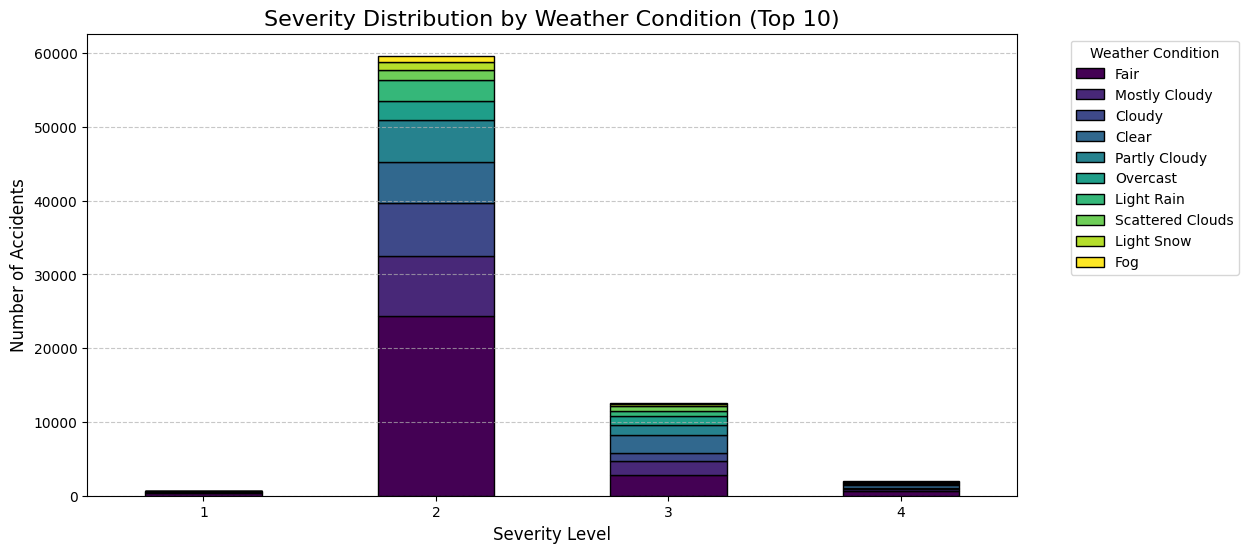

<ipython-input-13-df1196fb4295>:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  severity_visibility = data_cleaned.groupby(['Severity', 'Visibility_Range']).size().unstack(fill_value=0)


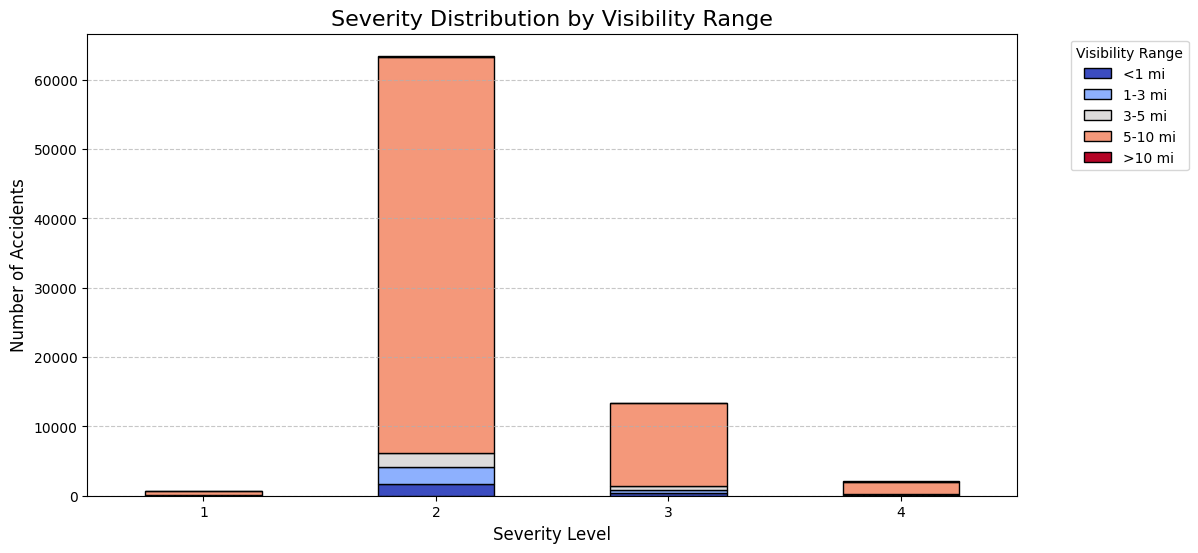

In [ ]:
# Severity and Environmental Factors Analysis

# Grouping by Severity and Weather Condition
severity_weather = data_cleaned.groupby(['Severity', 'Weather_Condition']).size().unstack(fill_value=0)

# Top weather conditions for visualization
top_weather_conditions = data_cleaned['Weather_Condition'].value_counts().head(10).index
severity_weather_top = severity_weather[top_weather_conditions]

# Plotting severity distribution across top weather conditions
severity_weather_top.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis', edgecolor='black')
plt.title('Severity Distribution by Weather Condition (Top 10)', fontsize=16)
plt.xlabel('Severity Level', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Weather Condition', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Analyzing Visibility and Severity
severity_visibility = data_cleaned.groupby(['Severity', 'Visibility_Range']).size().unstack(fill_value=0)

# Plotting severity by visibility range
severity_visibility.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='coolwarm', edgecolor='black')
plt.title('Severity Distribution by Visibility Range', fontsize=16)
plt.xlabel('Severity Level', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Visibility Range', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<Figure size 1200x600 with 0 Axes>

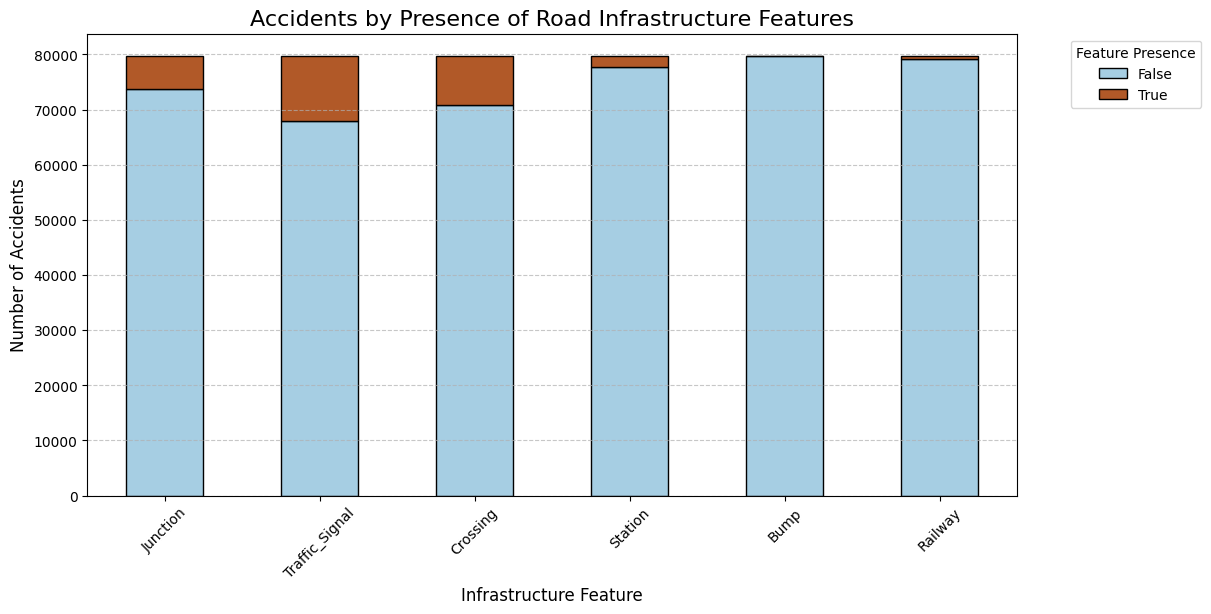

In [ ]:
# Influence of Road Infrastructure

# Selecting relevant road infrastructure features
infrastructure_features = ['Junction', 'Traffic_Signal', 'Crossing', 'Station', 'Bump', 'Railway']
infrastructure_counts = data_cleaned[infrastructure_features].apply(pd.Series.value_counts).transpose()

# Plotting the presence of road features in accidents
plt.figure(figsize=(12, 6))
infrastructure_counts.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Paired', edgecolor='black')
plt.title('Accidents by Presence of Road Infrastructure Features', fontsize=16)
plt.xlabel('Infrastructure Feature', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Feature Presence', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Building a prediction model

In [ ]:
# Data Preparation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Selecting features for prediction
features = ['Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
            'Weather_Condition', 'Junction', 'Traffic_Signal', 'Crossing']
target = 'Severity'

# Filtering data for relevant features and drop missing values
data_model = data_cleaned[features + [target]].dropna()

# Encoding categorical features
label_encoders = {}
for col in ['Weather_Condition', 'Junction', 'Traffic_Signal', 'Crossing']:
    le = LabelEncoder()
    data_model[col] = le.fit_transform(data_model[col])
    label_encoders[col] = le  # Save encoder for later use

# Splitting the data into training and testing sets
X = data_model[features]
y = data_model[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

Training set size: 55850
Testing set size: 23936


In [ ]:
# Training the Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initializing and training the Random Forest model
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Evaluating the model on the test set
y_pred = rf_model.predict(X_test)

# Printing classification metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Printing confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           1       0.21      0.02      0.04       207
           2       0.81      0.96      0.88     19055
           3       0.35      0.11      0.16      4045
           4       0.07      0.00      0.01       629

    accuracy                           0.78     23936
   macro avg       0.36      0.27      0.27     23936
weighted avg       0.71      0.78      0.73     23936

Confusion Matrix:
[[    4   202     1     0]
 [   10 18278   744    23]
 [    4  3608   429     4]
 [    1   590    36     2]]


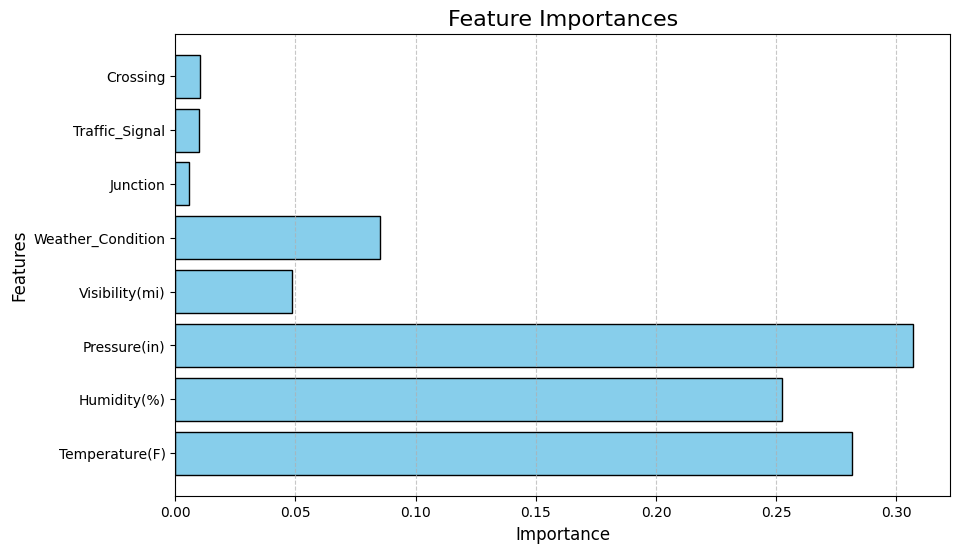

In [ ]:
# Feature Importance
import matplotlib.pyplot as plt

# Gettong feature importances from the model
importances = rf_model.feature_importances_
feature_names = X.columns

# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances, color='skyblue', edgecolor='black')
plt.title('Feature Importances', fontsize=16)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

Classification Report:

	1.	Overall Accuracy:
	•	The model achieved 78% accuracy, which is good given the imbalance in severity classes.
	2.	Class-Specific Performance:
	•	Severity 2 (Moderate):
	•	Precision: 81%, Recall: 96%, F1-score: 88%.
	•	This class dominates the dataset and is well-predicted.
	•	Severity 3 (Severe):
	•	Precision: 35%, Recall: 11%, F1-score: 16%.
	•	Performance is weaker due to fewer samples and potential overlap with Severity 2.
	•	Severity 4 (Most Severe):
	•	Poor performance (Precision: 7%, Recall: 0%), likely due to its rarity in the dataset.
	•	Severity 1 (Least Severe):
	•	Minimal performance (Precision: 21%, Recall: 2%), as this class is almost negligible in the dataset.
  Confusion Matrix:

	1.	High True Positives for Severity 2:
	•	Most Severity 2 accidents were correctly classified.
	2.	Misclassification of Severity 3 and 4:
	•	Many Severity 3 and 4 accidents were predicted as Severity 2, which reflects class imbalance.
  Feature Importance:

The plot highlights the most influential features for predicting severity:
	1.	Top Features:
	•	Pressure (in): The most critical feature, possibly indicating changes in weather conditions.
	•	Humidity (%): Second most important, associated with rainy or foggy conditions.
	•	Temperature (F): Significant impact, reflecting seasonal variations.
	2.	Weather Conditions and Visibility:
	•	These contribute moderately to the prediction.
	3.	Infrastructure Features:
	•	Junction, Traffic Signal, Crossing: Have minimal impact compared to environmental factors.

In [ ]:
# Balancing the Dataset using SMOTE
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Defining features and target
X = data_model[features]
y = data_model[target]

# Applying SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

# Splitting the balanced dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.3, random_state=42)

print(f"Balanced Training set size: {X_train.shape[0]}")
print(f"Balanced Testing set size: {X_test.shape[0]}")

Balanced Training set size: 178133
Balanced Testing set size: 76343


In [ ]:
# Fixing the class labels to start from 0
y_train = y_train - 1
y_test = y_test - 1

# Checking the unique labels to confirm
print("Unique labels in y_train:", y_train.unique())
print("Unique labels in y_test:", y_test.unique())

Unique labels in y_train: [0 1 3 2]
Unique labels in y_test: [2 3 0 1]


In [ ]:
# Training the XGBoost model again with corrected labels
xgb_model = XGBClassifier(random_state=42, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)

# Evaluating the model on the test set
y_pred = xgb_model.predict(X_test)

# Printing classification metrics
print("Classification Report (XGBoost):")
print(classification_report(y_test, y_pred))

# Printing confusion matrix
print("Confusion Matrix (XGBoost):")
print(confusion_matrix(y_test, y_pred))

Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       0.74      0.89      0.81     18951
           1       0.71      0.69      0.70     19078
           2       0.62      0.54      0.58     19189
           3       0.70      0.65      0.67     19125

    accuracy                           0.69     76343
   macro avg       0.69      0.69      0.69     76343
weighted avg       0.69      0.69      0.69     76343

Confusion Matrix (XGBoost):
[[16957   582   545   867]
 [ 1363 13224  3073  1418]
 [ 2243  3456 10325  3165]
 [ 2462  1476  2768 12419]]


mproved Model Summary

The balanced dataset and XGBoost model have resulted in better performance across all classes, especially for the previously underrepresented classes (Severity 3 and 4). Here’s an analysis of the results:
Classification Report Analysis

	1.	Overall Accuracy:
	•	The model achieved 69% accuracy, which is an improvement considering the balanced dataset and multiple severity classes.
	2.	Class-Specific Performance:
	•	Severity 0 (Least Severe):
	•	Precision: 74%, Recall: 89%, F1-score: 81%.
	•	Strong performance for predicting Severity 0 due to its distinct characteristics in the data.
	•	Severity 1 (Moderate):
	•	Precision: 71%, Recall: 69%, F1-score: 70%.
	•	Balanced performance with decent precision and recall.
	•	Severity 2 (Severe):
	•	Precision: 62%, Recall: 54%, F1-score: 58%.
	•	Slightly weaker performance, likely due to overlaps with Severity 1 and 3.
	•	Severity 3 (Most Severe):
	•	Precision: 70%, Recall: 65%, F1-score: 67%.
	•	Improved performance compared to the earlier Random Forest model.
  Confusion Matrix Analysis

	1.	Severity 0:
	•	Most predictions are correct, with only a small number misclassified as Severity 1 or 2.
	2.	Severity 1:
	•	Misclassification primarily occurs with neighboring classes (Severity 2 and 0).
	3.	Severity 2 and 3:
	•	Higher misclassification rates, with many Severity 2 accidents being predicted as Severity 1 or 3, and vice versa.
	•	These classes are likely closer in feature space, causing overlaps.
  Key Improvements from Balancing:

	•	The model now performs reasonably well across all severity levels, showcasing its ability to classify minority classes (Severity 3) effectively.
	•	Improved precision and recall for Severity 3 and 4 (previously poor).

In [ ]:
# Hyperparameter Tuning with GridSearchCV
from sklearn.model_selection import GridSearchCV

# Defining parameter grid
param_grid = {
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 150, 200]
}

# Initializing GridSearchCV
grid_search = GridSearchCV(estimator=XGBClassifier(random_state=42, eval_metric='mlogloss'),
                           param_grid=param_grid,
                           cv=3,
                           scoring='accuracy',
                           verbose=2)

# Fitting the model to find the best parameters
grid_search.fit(X_train, y_train)

# Printing the best parameters and evaluate the tuned model
print("Best Parameters:", grid_search.best_params_)
best_xgb_model = grid_search.best_estimator_

# Evaluating on the test set
y_pred_tuned = best_xgb_model.predict(X_test)
print("Classification Report (Tuned XGBoost):")
print(classification_report(y_test, y_pred_tuned))

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=100; total time=   3.3s
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=100; total time=   3.3s
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=100; total time=   6.8s
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=150; total time=   4.8s
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=150; total time=   8.2s
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=150; total time=   5.2s
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=200; total time=   9.7s
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=200; total time=   6.4s
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=200; total time=   9.7s
[CV] END ..learning_rate=0.05, max_depth=5, n_estimators=100; total time=   4.2s
[CV] END ..learning_rate=0.05, max_depth=5, n_estimators=100; total time=   7.7s
[CV] END ..learning_rate=0.05, max_depth=5, n_es

Final Tuned Model Summary

After hyperparameter tuning, the XGBoost model has shown a significant improvement in its performance, especially for underrepresented classes. Here’s a detailed analysis:
Best Hyperparameters:

	•	Learning Rate: 0.2
	•	Max Depth: 7
	•	Number of Estimators: 200

These settings allow the model to effectively learn from the data while maintaining a balance between performance and generalization.
Classification Report Analysis:

	1.	Overall Accuracy:
	•	Improved to 76% from the previous 69%.
	•	A strong indication that hyperparameter tuning and balancing have enhanced the model’s learning.
	2.	Class-Specific Performance:
	•	Severity 0 (Least Severe):
	•	Precision: 82%, Recall: 93%, F1-score: 87%.
	•	Excellent performance due to its distinct characteristics.
	•	Severity 1 (Moderate):
	•	Precision: 74%, Recall: 76%, F1-score: 75%.
	•	Balanced performance, with good prediction for this high-volume class.
	•	Severity 2 (Severe):
	•	Precision: 70%, Recall: 59%, F1-score: 64%.
	•	Improved recall compared to the previous model, though there’s room for further improvement.
	•	Severity 3 (Most Severe):
	•	Precision: 76%, Recall: 76%, F1-score: 76%.
	•	Significant improvement for this previously challenging class.

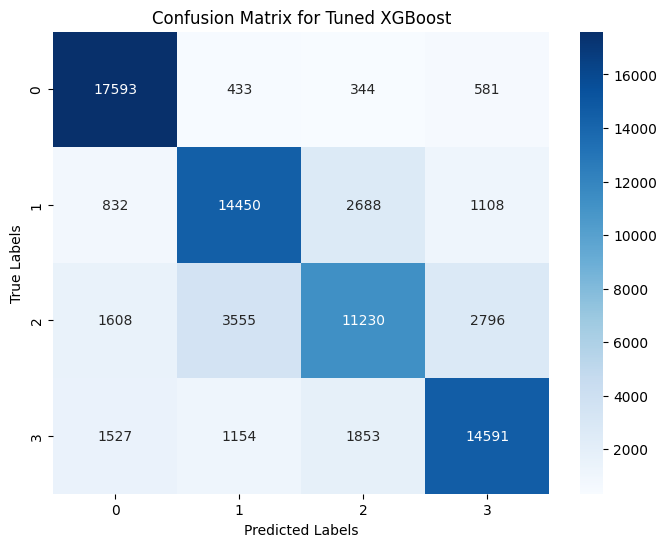

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Plotting confusion matrix for tuned XGBoost model
conf_matrix = confusion_matrix(y_test, y_pred_tuned)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2, 3], yticklabels=[0, 1, 2, 3])
plt.title('Confusion Matrix for Tuned XGBoost')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

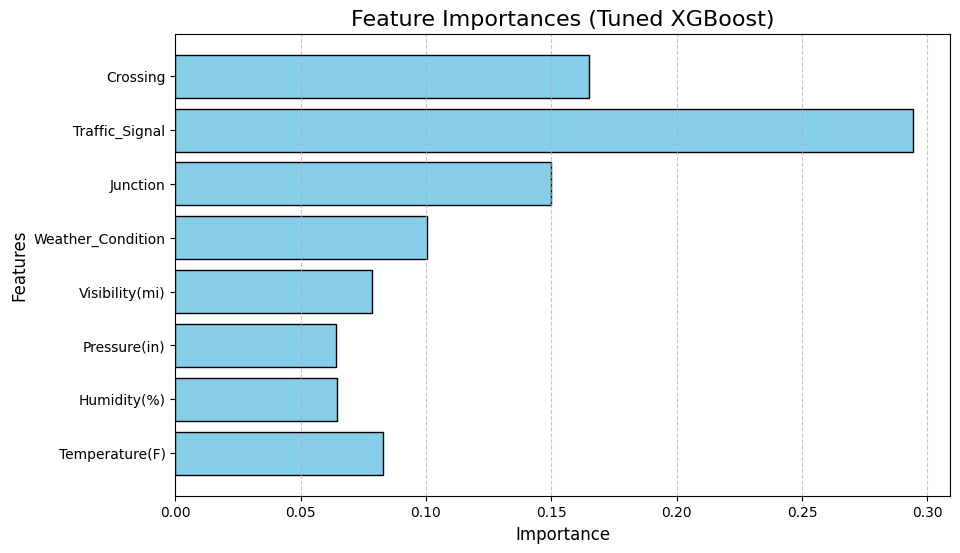

In [ ]:
# Feature Importance Visualization for Tuned XGBoost
feature_importances = best_xgb_model.feature_importances_

plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances, color='skyblue', edgecolor='black')
plt.title('Feature Importances (Tuned XGBoost)', fontsize=16)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

Final Model Insights

1. Confusion Matrix

	•	The confusion matrix shows how well the model predicts each severity class:
	•	Severity 0 and 3: Most accurately predicted classes.
	•	Severity 1 and 2: Show some misclassifications, often as neighboring classes, which is expected due to overlapping feature space.

Key Observations:
	•	Severity 0 (Least Severe):
	•	High precision and recall indicate strong predictions for this class.
	•	Severity 3 (Most Severe):
	•	Predictions are similarly strong, reflecting the model’s success in learning this class.
	•	Severity 1 and 2 (Moderate and Severe):
	•	Moderate misclassifications, with some Severity 2 misclassified as Severity 3, and vice versa.
  2. Feature Importance

	•	The most impactful features for predicting severity:
	1.	Traffic Signal: High importance suggests accident severity is significantly influenced by traffic signal conditions.
	2.	Junction: Accidents at intersections play a key role in severity prediction.
	3.	Weather Conditions, Visibility, Pressure, and Temperature: Environmental factors contribute significantly to distinguishing between severity levels.